In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [2]:
# supported currency in the dataset
currency_choices = ["AUD","BRL","CAD","EUR","GBP","INR","JPY","MXN","PKR","SGD","TRY","USD","NZD","NNR","MYR","IDR","PHP",]

# import libraries
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Input, Conv2D, Flatten, MaxPool2D
from keras.models import Model, Sequential, load_model

# Extract image embedding from the csv file

In [3]:
PATH = "/content/drive/MyDrive/VIP/banknote_net.csv"
data = pd.read_csv(PATH) 
data = data[data.Currency != "USD"] # extract one currency 
data['currency_denomination'] = data['Currency'] + "_" + data['Denomination']
del data["Currency"]
del data["Denomination"]
# print(data)
data = data.sample(frac=1) # shuffle the dataset

labels = data.pop("currency_denomination") # get denomination and currency as labels
labels = labels.astype("category") # group the same labels into same category 
encoded_labels = pd.get_dummies(labels) # convert to a one-hot encoded data

data = data.iloc[:,1:] # remove row number column
# print(data) 

<ipython-input-3-8492bfc927dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['currency_denomination'] = data['Currency'] + "_" + data['Denomination']


# Train the DNN classifier

In [4]:
NUM_CLASSES = len(labels.unique())
NUM_TRAIN_SAMPLES = len(data) 

# Leng Lohanakakul 11/7/2022
# Define a convolutional neural network that takes an input shape of 128x128x3
model = Sequential()
model.add(Input(shape=(256,)))
model.add(Dense(128, activation="relu")) 
model.add(Dropout(0.5)) 
model.add(Dense(NUM_CLASSES, activation="softmax"))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

n_epochs=30
training = model.fit(x=data.values, y=encoded_labels.values, epochs=n_epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 210)               27090     
                                                                 
Total params: 59,986
Trainable params: 59,986
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
726/726 [==============================] - 3s 3ms/step - loss: 1.7463 - accuracy: 0.6476
Epoch 2/30
726/726 [==============================] - 2s 3ms/step - loss: 0.5882 - accuracy: 0.8583
Epoch 3/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4697 - accuracy: 0.8799
Epoch 4/30
726/726 [==============================] - 2s 3ms/step - loss: 0.3973 - accuracy: 0.8954
Epoch 5/30
726/726 [==============================] - 2s 3ms/step - loss: 0.3614 - accuracy: 0.9022
Epoch 6/30
726/726 [==============================] - 2s 3ms/step - loss: 0.3431 - accuracy: 0.9054
Epoch 7/30
726/726 [==============================] - 2s 3ms/step - loss: 0.3139 - accuracy: 0.9120
Epoch 8/30
726/726 [==============================] - 2s 3ms/step - loss: 0.3008 - accuracy: 0.9151
Epoch 9/30
726/726 [==============================] - 2s 3ms/step - loss: 0.2858 - accuracy: 0.9187
Epoch 10/30
726/726 [==============================] - 2s 3ms/step - loss: 0.2725 - accuracy: 0.9192

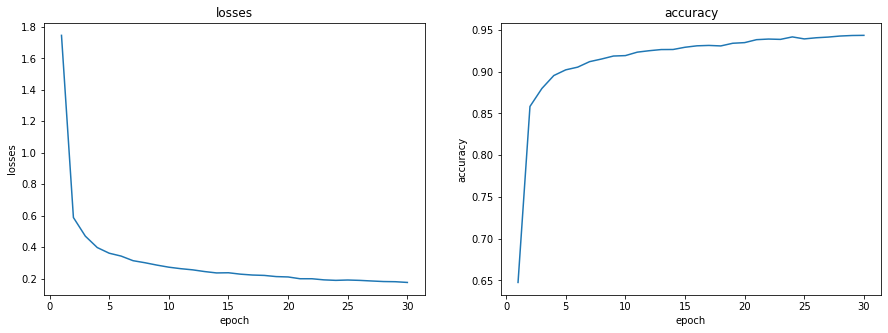

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), squeeze=False) 
# plot the loss value over n_epochs 
ax[0,0].plot(range(1,n_epochs+1), training.history['loss'])
ax[0,0].set_title("losses")
ax[0,0].set_xlabel('epoch') 
ax[0,0].set_ylabel('losses')
# plot the accuracy over n_epochs
ax[0,1].plot(range(1,n_epochs+1), training.history['accuracy'])
ax[0,1].set_title("accuracy")
ax[0,1].set_xlabel('epoch') 
ax[0,1].set_ylabel('accuracy')

plt.show() 